In [1]:
import matplotlib.pyplot as plt
import math

from sympy.ntheory import isprime

In [2]:
class Walker():
    def __init__(self, angle=0):
        self.angle = angle
        self.positions = [(0.0, 0.0)]
        self.visited_positions = set([(0.0, 0.0)])
        
    def get_positions(self):
        return self.positions
    
    def get_visited_positions(self):
        return self.visited_positions
    
    def get_current_number(self):
        return len(self.positions)
    
    def get_current_position(self):
        return self.positions[-1]
        
    def try_walk(self, distance=1):
        new_pos = self.peek(distance)
        if new_pos in self.visited_positions:
            return False
        else:
            self.positions.append(new_pos)
            self.visited_positions.add(new_pos)
            return True
        
    def peek(self, distance=1):
        last_posx, last_posy = self.positions[-1]
        new_posx = last_posx + distance * math.cos(math.radians(self.angle))
        new_posy = last_posy + distance * math.sin(math.radians(self.angle))
        new_posx = round(new_posx, 3)
        new_posy = round(new_posy, 3)
        return (new_posx, new_posy)
    
    def turn_left(self, angle):
        self.angle += angle
        self._adjust_angle()
        
    def turn_right(self, angle):
        self.angle -= angle
        self._adjust_angle()
        
    def _adjust_angle(self):
        while self.angle < 0:
            self.angle += 360
        
        while self.angle > 360:
            self.angle -= 360
    

In [3]:
class PrimeSpiral:
    def __init__(self):
        pass
    
    def next_prime(self):
        n = 2
        while True:
            if isprime(n):
                yield n
            n += 1
    
    def draw(self, length, count, draw_line):
        primes = set()
        prime_gen = self.next_prime()
        for i in range(count):
            prime = next(prime_gen)
            primes.add(prime)
        
        angle = 360/length

        plt.axes([0, 0, 2, 2])
        plt.axis('equal')
        plt.axis('off')

        walker = Walker()
        
        for step in range(1, prime+1):
            if step == 1:
                walker.try_walk()
            else:
                walker.turn_left(angle)
                if not walker.try_walk():
                    walker.turn_right(angle)
                    walker.try_walk()

            current_num = walker.get_current_number()
            current_pos = walker.get_current_position()
            if current_num in primes:
                plt.plot(current_pos[0], current_pos[1], marker='o', markersize=4, color="red")
            
        if draw_line:
            pts = walker.get_positions()
            x_pts, y_pts = list(zip(*pts)) 
            plt.plot(x_pts, y_pts)

        plt.show()

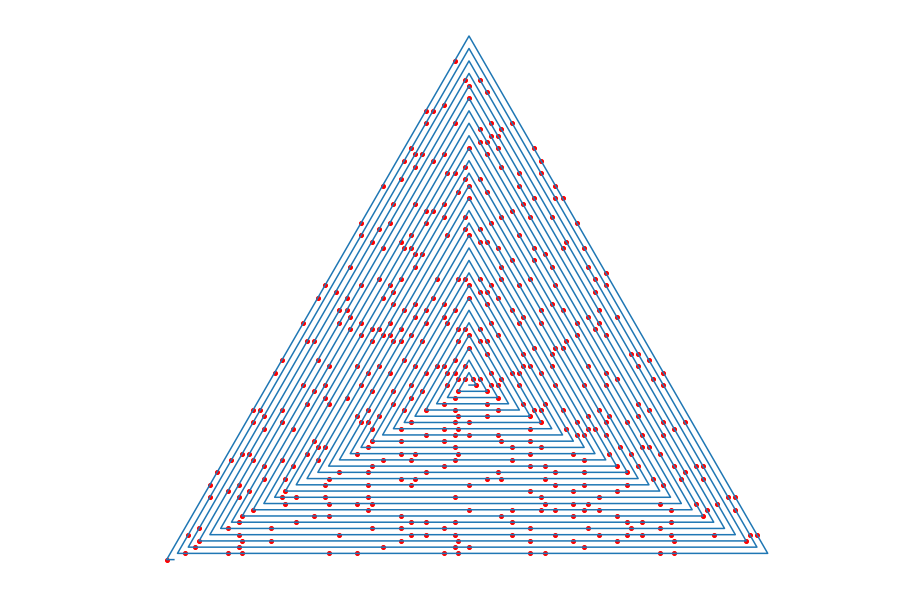

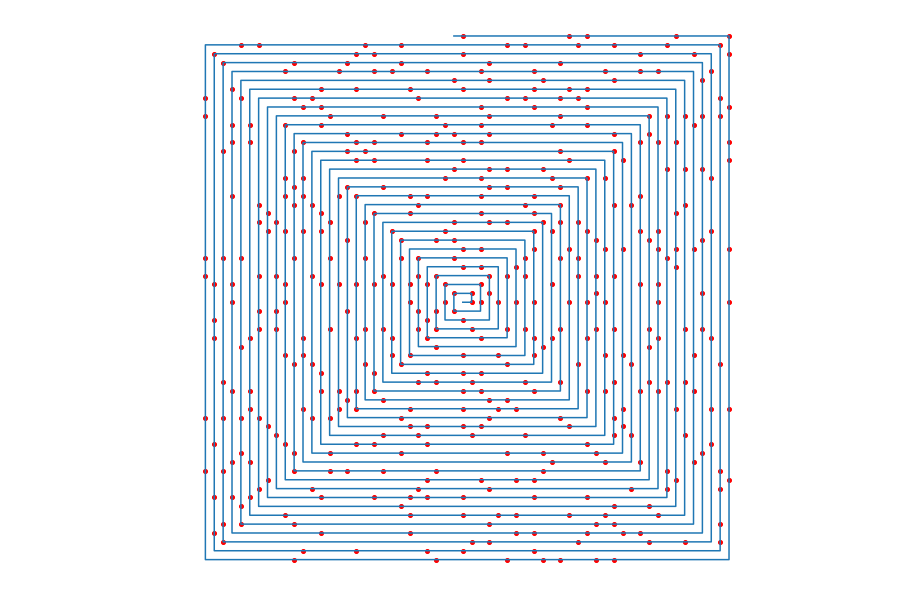

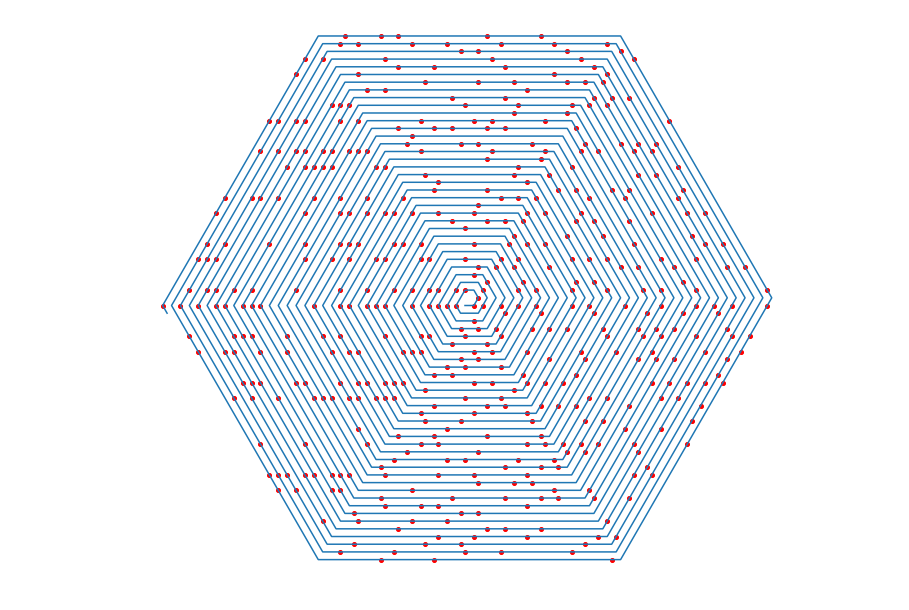

In [4]:
ps = PrimeSpiral()
lengths = [3, 4, 6]
for length in lengths:
    ps.draw(
        length = length,
        count = 500,
        draw_line = True
    )

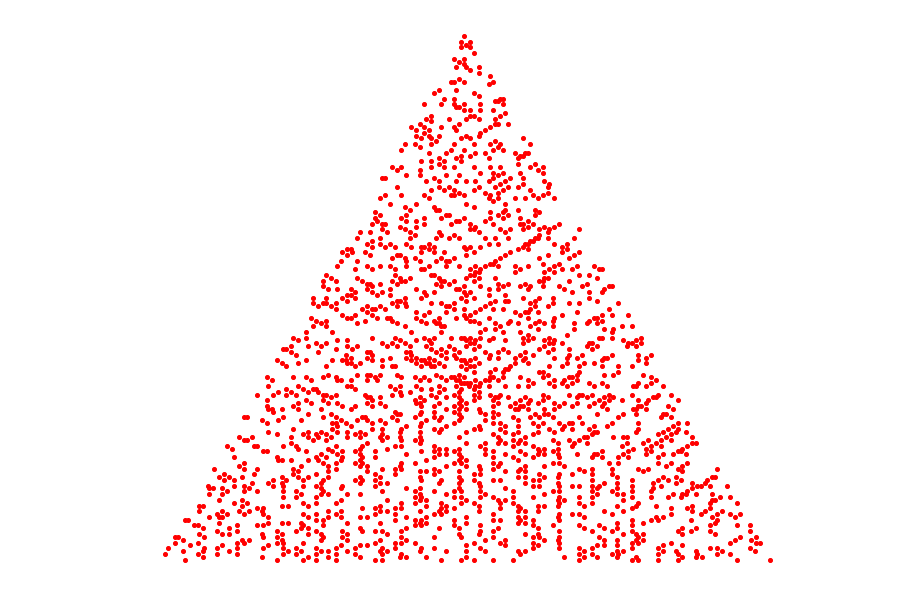

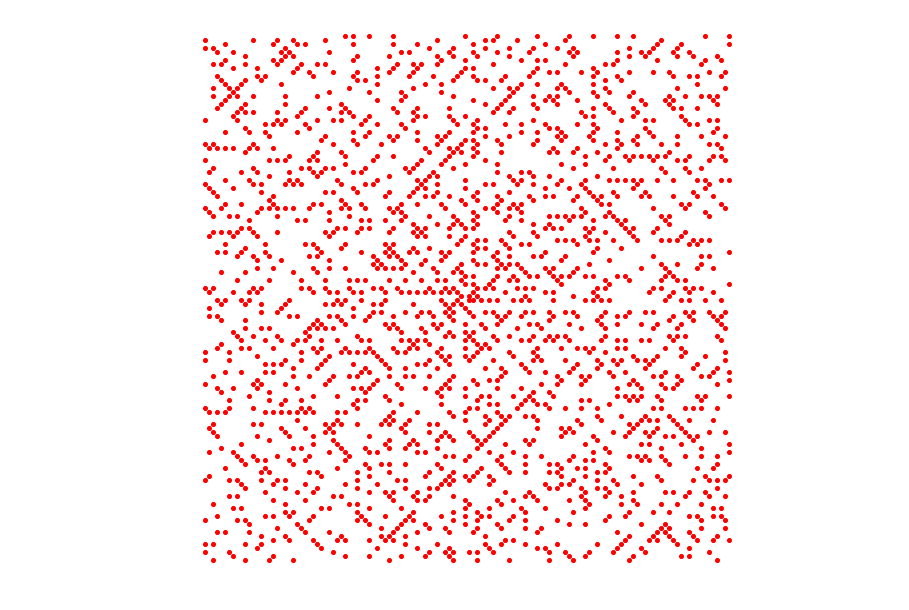

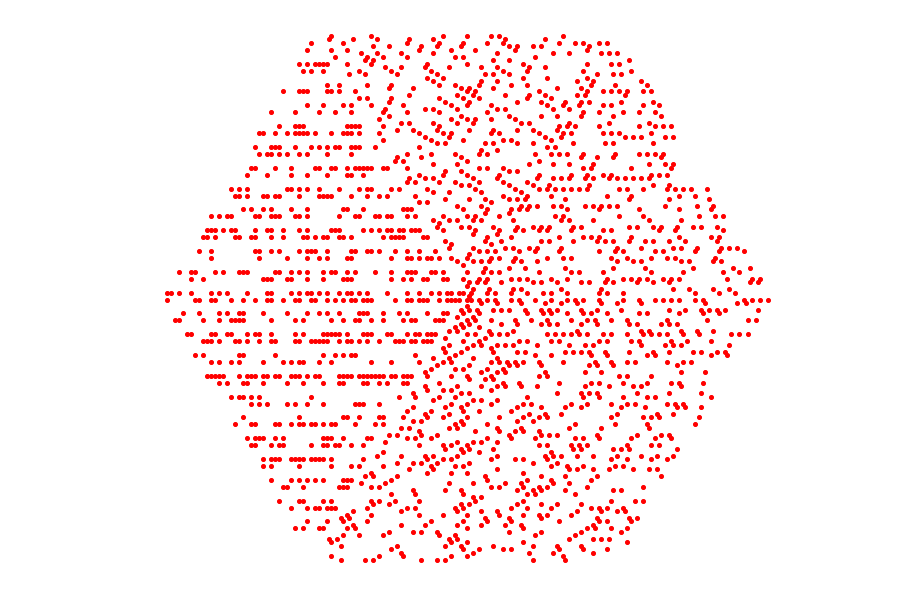

In [5]:
ps = PrimeSpiral()
lengths = [3, 4, 6]
for length in lengths:
    ps.draw(
        length = length,
        count = 2000,
        draw_line = False
    )

In [ ]:
ps = PrimeSpiral()
ps.draw(
    length = 8,
    count = 500,
    draw_line = True
)